In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as sco

In [2]:
cd C:\Users\hwlcr\Desktop\HMD

C:\Users\hwlcr\Desktop\HMD


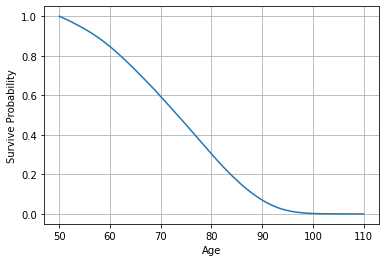

In [3]:
# Real Value
y0, age0, y1 = 1957, 50, 2017
data = pd.read_table('mltper_1x1_US.txt', encoding='gb2312', delim_whitespace=True)

data = data[['Year', 'Age', 'mx', 'qx']]
data = data[data['Year'] >= y0]

dd = []
temp = 0
for i in range(y1-y0+1):
    temp = data[data['Year']==y0+i].iloc[age0+i]['qx']
    dd.append(temp)
dd[0] = 0
px = 1 - np.array(dd)
S_real = np.cumprod(px)
plt.plot(range(50, 111), S_real)
plt.grid()
plt.xlabel('Age')
plt.ylabel('Survive Probability')

ini = data[data['Year']==y0].iloc[age0]['mx']

0.002361365982205639 0.8984202215253079 1.6904896509979195e-05 0.10239498841123665
-133.01396804112557 -377.4446521631776


Text(0, 0.5, 'Survive Probability')

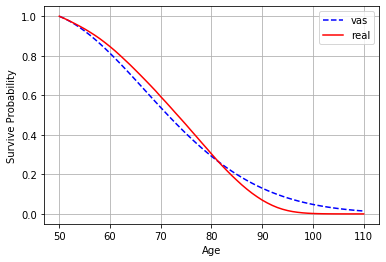

In [25]:
# Vasicek
def e_vas(p):
    k, mu, sigma = p
    B = lambda t:(np.exp(-k*t)-1) / k
    A = lambda t:-((B(t)+t)*(k**2*mu-0.5*sigma**2)) / (k**2) - (sigma*B(t))**2 / (4*k)
    t = np.arange(y1-y0+1)
    S_vas = np.exp(A(t) + B(t)*ini)
    return np.sum((S_vas - S_real)**2)

bnds = ((0, 10), (0, 10), (0, 10))

r_vas = sco.minimize(e_vas, [0.0060, 0.6000, 0.0004], method='SLSQP', bounds=bnds)

print(r_vas.x[0], r_vas.x[1], r_vas.x[2], r_vas.fun)

k, mu, sigma = r_vas.x[0], r_vas.x[1], r_vas.x[2]
B = lambda t:(np.exp(-k*t)-1) / k
A = lambda t:-((B(t)+t)*(k**2*mu-0.5*sigma**2)) / (k**2) - (sigma*B(t))**2 / (4*k)
t = np.arange(y1-y0+1)
S_vas = np.exp(A(t) + B(t)*ini)

n = y1-y0+1
p = len(r_vas.x)
ss = np.sum((S_vas - S_real)**2)
AIC = 2 * p + n * np.log(ss)
BIC = n * np.log(ss/n) + p * np.log(n)
print(AIC, BIC)

plt.plot(range(50, 111), S_vas, 'b--', label='vas')
plt.plot(range(50, 111), S_real, 'r', label='real')
plt.legend()
plt.grid()
plt.xlabel('Age')
plt.ylabel('Survive Probability')

0.0017518550238033953 1.1982010476114482 1.2768114578454909e-06 0.10070072684644098
-134.03173794203474 -378.46242206408675


Text(0, 0.5, 'Survive Probability')

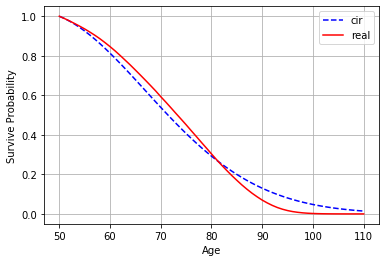

In [27]:
# CIR
def e_cir(p):
    k, mu, sigma = p
    b = -np.sqrt(k**2 + 2*sigma**2)
    c = (b - k) / 2
    d = (b + k) / 2
    A = lambda t:-(2*k*mu)/(sigma**2)*np.log((c+d*np.exp(b*t))/b) + (k*mu*t)/c
    B = lambda t:(1 - np.exp(b*t)) / (c + d*np.exp(b*t))
    t = np.arange(y1-y0+1)
    S_cir = np.exp(A(t) + B(t)*ini)
    return np.sum((S_cir - S_real)**2)

bnds = ((0, 10), (0, 10), (0, 10))

r_cir = sco.minimize(e_cir, [0.0070, 0.4000, 0.0010], method='SLSQP', bounds=bnds)

print(r_cir.x[0], r_cir.x[1], r_cir.x[2], r_cir.fun)

k, mu, sigma = r_cir.x[0], r_cir.x[1], r_cir.x[2]
b = -np.sqrt(k**2 + 2*sigma**2)
c = (b - k) / 2
d = (b + k) / 2
A = lambda t:-(2*k*mu)/(sigma**2)*np.log((c+d*np.exp(b*t))/b) + (k*mu*t)/c
B = lambda t:(1 - np.exp(b*t)) / (c + d*np.exp(b*t))
t = np.arange(y1-y0+1)
S_cir = np.exp(A(t) + B(t)*ini)

n = y1-y0+1
p = len(r_cir.x)
ss = np.sum((S_cir - S_real)**2)
AIC = 2 * p + n * np.log(ss)
BIC = n * np.log(ss/n) + p * np.log(n)
print(AIC, BIC)

plt.plot(range(50, 111), S_cir, 'b--', label='cir')
plt.plot(range(50, 111), S_real, 'r', label='real')
plt.legend()
plt.grid()
plt.xlabel('Age')
plt.ylabel('Survive Probability')

0.07930431082730702 0.001160932718469352 0.003693915119297844
-337.66517090312146 -584.2067288893468


Text(0, 0.5, 'Survive Probability')

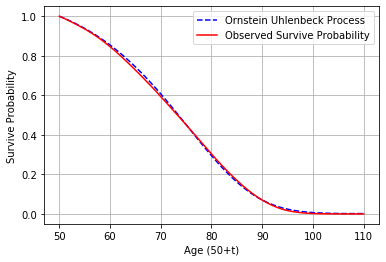

In [6]:
# O-U
def e_ou(p):
    a, sigma = p
    A = lambda t:sigma**2*t/(2*a**2) - sigma**2*np.exp(a*t)/a**3 + sigma**2*np.exp(2*a*t)/(4*a**3) + (3*sigma**2)/(4*a**3)
    B = lambda t:1/a * (1 - np.exp(a*t))
    t = np.arange(y1-y0+1)
    S_ou = np.exp(A(t) + B(t)*ini)
    return np.sum((S_ou - S_real)**2)

bnds = ((0, 10), (0, 10))

r_ou = sco.minimize(e_ou, [0.1000, 0.0009], method='SLSQP', bounds=bnds)

print(r_ou.x[0], r_ou.x[1], r_ou.fun)

a, sigma = r_ou.x[0], r_ou.x[1]
A = lambda t:sigma**2*t/(2*a**2) - sigma**2*np.exp(a*t)/a**3 + sigma**2*np.exp(2*a*t)/(4*a**3) + (3*sigma**2)/(4*a**3)
B = lambda t:1/a * (1 - np.exp(a*t))
t = np.arange(y1-y0+1)
S_ou = np.exp(A(t) + B(t)*ini)

n = y1-y0+1
p = len(r_ou.x)
ss = np.sum((S_ou - S_real)**2)
AIC = 2 * p + n * np.log(ss)
BIC = n * np.log(ss/n) + p * np.log(n)
print(AIC, BIC)

plt.plot(range(50, 111), S_ou, 'b--', label='Ornstein Uhlenbeck Process')
plt.plot(range(50, 111), S_real, 'r', label='Observed Survive Probability')
plt.legend()
plt.grid()
plt.xlabel('Age (50+t)')
plt.ylabel('Survive Probability')

0.10796403961529509 0.0008296005823977592 0.004329331423181607 -0.0001662089756301463 0.43927950958089734
-42.179781718100365 -284.4995919759791


Text(0, 0.5, 'Survive Probability')

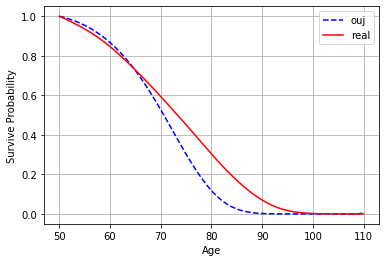

In [32]:
# O-U with Jump
def e_ouj(p):
    a, sigma, l, u = p
    b = (sigma**2/(2*a**2) + (l*a)/(a-u))
    c = l / (a - u)
    A = lambda t:b*t - sigma**2*np.exp(a*t)/a**3 + sigma**2*np.exp(2*a*t)/(4*a**3) + (3*sigma**2)/(4*a**3) + c*np.log(1-u/a+u/a*np.exp(a*t))
    B = lambda t:1/a * (1 - np.exp(a*t))
    t = np.arange(y1-y0+1)
    S_ouj = np.exp(A(t) + B(t)*ini)
    return np.sum((S_ouj - S_real)**2)

bnds = ((0, 10), (0, 10), (0, 10), (-10, 0))

r_ouj = sco.minimize(e_ouj, [0.1080, 0.00001, 0.001, -0.0001], method='SLSQP', bounds=bnds)

print(r_ouj.x[0], r_ouj.x[1], r_ouj.x[2], r_ouj.x[3], r_ouj.fun)

a, sigma, l, u = r_ouj.x[0], r_ouj.x[1], r_ouj.x[2], r_ouj.x[3]
b = (sigma**2/(2*a**2) + (l*a)/(a-u))
c = l / (a - u)
A = lambda t:b*t - sigma**2*np.exp(a*t)/a**3 + sigma**2*np.exp(2*a*t)/(4*a**3) + (3*sigma**2)/(4*a**3) + c*np.log(1-u/a+u/a*np.exp(a*t))
B = lambda t:1/a * (1 - np.exp(a*t))
t = np.arange(y1-y0+1)
S_ouj = np.exp(A(t) + B(t)*ini)

n = y1-y0+1
p = len(r_ouj.x)
ss = np.sum((S_ouj - S_real)**2)
AIC = 2 * p + n * np.log(ss)
BIC = n * np.log(ss/n) + p * np.log(n)
print(AIC, BIC)

plt.plot(range(50, 111), S_ouj, 'b--', label='ouj')
plt.plot(range(50, 111), S_real, 'r', label='real')
plt.legend()
plt.grid()
plt.xlabel('Age')
plt.ylabel('Survive Probability')

0.08000149236993707 0.010468669959318862 0.003389182405822201
-342.91716045898926 -589.4587184452146


Text(0, 0.5, 'Survive Probability')

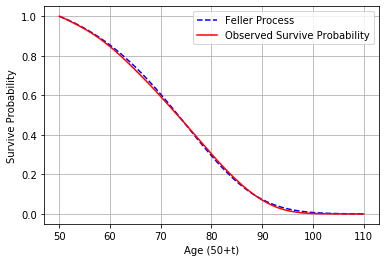

In [5]:
# Feller
def e_feller(p):
    a, sigma = p
    b = -np.sqrt(a**2 + 2*sigma**2)
    c = (b + a) / 2
    d = (b - a) / 2
    A = 0
    B = lambda t:(1 - np.exp(b*t)) / (c + d*np.exp(b*t))
    t = np.arange(y1-y0+1)
    S_feller = np.exp(A + B(t)*ini)
    return np.sum((S_feller - S_real)**2)

bnds = ((0, 10), (0, 10))

r_feller = sco.minimize(e_feller, [0.0700, 0.0080], method='SLSQP', bounds=bnds)

print(r_feller.x[0], r_feller.x[1], r_feller.fun)

a, sigma = r_feller.x[0], r_feller.x[1]
b = -np.sqrt(a**2 + 2*sigma**2)
c = (b + a) / 2
d = (b - a) / 2
A = 0
B = lambda t:(1 - np.exp(b*t)) / (c + d*np.exp(b*t))
t = np.arange(y1-y0+1)
S_feller = np.exp(A + B(t)*ini)

n = y1-y0+1
p = len(r_feller.x)
ss = np.sum((S_feller - S_real)**2)
AIC = 2 * p + n * np.log(ss)
BIC = n * np.log(ss/n) + p * np.log(n)
print(AIC, BIC)

plt.plot(range(50, 111), S_feller, 'b--', label='Feller Process')
plt.plot(range(50, 111), S_real, 'r',label='Observed Survive Probability')
plt.legend()
plt.grid()
plt.xlabel('Age (50+t)')
plt.ylabel('Survive Probability')

0.10799826013056149 1.1145261157948685e-05 0.0010112210434127646 -0.00016524711335028243 0.608744225929175
-22.277782475172945 -264.59759273305167


Text(0, 0.5, 'Survive Probability')

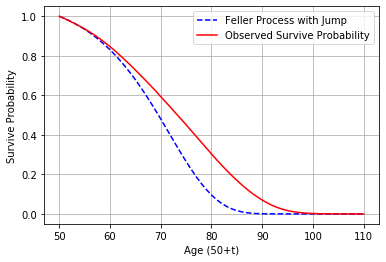

In [7]:
# Feller with Jump
def e_fellerj(p):
    a, sigma, l, u = p
    b = -np.sqrt(a**2 + 2*sigma**2)
    c = (b + a) / 2
    d = (b - a) / 2
    e = (l*u*(c+d))/(b*(d+u)*(c-u))
    f = np.log(-c-d)
    A = lambda t:(l*u*t)/(c-u) - e*(np.log(u-c-(d+u)*np.exp(b*t)) - f)
    B = lambda t:(1 - np.exp(b*t)) / (c + d*np.exp(b*t))
    t = np.arange(y1-y0+1)
    S_fellerj = np.exp(A(t) + B(t)*ini)
    return np.sum((S_fellerj - S_real)**2)

bnds = ((0, 10), (0, 10), (0, 10), (-10, 0))

r_fellerj = sco.minimize(e_fellerj, [0.1080, 0.00001, 0.001, -0.0001], method='SLSQP', bounds=bnds)

print(r_fellerj.x[0], r_fellerj.x[1], r_fellerj.x[2], r_fellerj.x[3],r_fellerj.fun)

a, sigma, l, u = r_fellerj.x[0], r_fellerj.x[1], r_fellerj.x[2], r_fellerj.x[3]
b = -np.sqrt(a**2 + 2*sigma**2)
c = (b + a) / 2
d = (b - a) / 2
e = (l*u*(c+d))/(b*(d+u)*(c-u))
f = np.log(-c-d)
A = lambda t:(l*u*t)/(c-u) - e*(np.log(u-c-(d+u)*np.exp(b*t)) - f)
B = lambda t:(1 - np.exp(b*t)) / (c + d*np.exp(b*t))
t = np.arange(y1-y0+1)
S_fellerj = np.exp(A(t) + B(t)*ini)

n = y1-y0+1
p = len(r_fellerj.x)
ss = np.sum((S_fellerj - S_real)**2)
AIC = 2 * p + n * np.log(ss)
BIC = n * np.log(ss/n) + p * np.log(n)
print(AIC, BIC)

plt.plot(range(50, 111), S_fellerj, 'b--', label='Feller Process with Jump')
plt.plot(range(50, 111), S_real, 'r', label='Observed Survive Probability')
plt.legend()
plt.grid()
plt.xlabel('Age (50+t)')
plt.ylabel('Survive Probability')

0.010329999999999976 2.2888260774276525e-17 -0.08080632220613303 -0.06764813957424444 1.95744487102392e-19 0.0018408994214832942
-339.1484530721826 -577.2465156017147


Text(0, 0.5, 'Survive Probability')

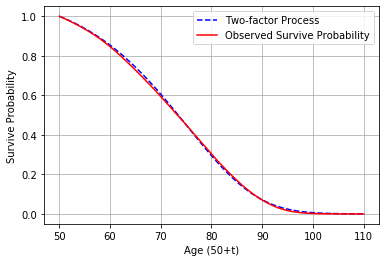

In [8]:
# Blackburn and Sherris
def e_bs(p):
    c1, c2, d1, d2, r1, r2 = p
    A1 = lambda t:(1 - np.exp(-d1*t)) / d1
    A2 = lambda t:(1 - np.exp(-d2*t)) / d2
    B = lambda t:0.5 * (r1**2/d1**3*(0.5*(1-np.exp(-2*d1*t))-2*(1-np.exp(-d1*t))+d1*t) + r2**2/d2**3*(0.5*(1-np.exp(-2*d2*t))-2*(1-np.exp(-d2*t))+d2*t))
    t = np.arange(y1-y0+1)
    S_bs = np.exp(-A1(t)*c1 - A2(t)*c2 + B(t))
    return np.sum((S_bs - S_real)**2)

cons = ({'type': 'eq', 'fun': lambda p:ini - p[0] - p[1]})

bnds = ((0, 10), (0, 10), (-10, 0), (-10, 0), (0, 10), (0, 10))

r_bs = sco.minimize(e_bs, [0.005, 0.005, -0.1, -0.1, 0.0001, 0.0001], method='SLSQP', bounds=bnds, constraints=cons)

print(r_bs.x[0], r_bs.x[1], r_bs.x[2], r_bs.x[3], r_bs.x[4], r_bs.x[5])

c1, c2, d1, d2, r1, r2 = r_bs.x[0], r_bs.x[1], r_bs.x[2], r_bs.x[3], r_bs.x[4], r_bs.x[5]
A1 = lambda t:(1 - np.exp(-d1*t)) / d1
A2 = lambda t:(1 - np.exp(-d2*t)) / d2
B = lambda t:0.5 * (r1**2/d1**3*(0.5*(1-np.exp(-2*d1*t))-2*(1-np.exp(-d1*t))+d1*t) + r2**2/d2**3*(0.5*(1-np.exp(-2*d2*t))-2*(1-np.exp(-d2*t))+d2*t))
t = np.arange(y1-y0+1)
S_bs = np.exp(-A1(t)*c1 - A2(t)*c2 + B(t))

n = y1-y0+1
p = len(r_bs.x)
ss = np.sum((S_bs - S_real)**2)
AIC = 2 * p + n * np.log(ss)
BIC = n * np.log(ss/n) + p * np.log(n)
print(AIC, BIC)

plt.plot(range(50, 111), S_bs, 'b--', label='Two-factor Process')
plt.plot(range(50, 111), S_real, 'r', label='Observed Survive Probability')
plt.legend()
plt.grid()
plt.xlabel('Age (50+t)')
plt.ylabel('Survive Probability')